# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 22.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 15.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 40.1MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE
data.shape  # Посмотреть что за тензор эти данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
# Посмотрим на 5 случайных строчек
data.sample(5, random_state=10)

# Проверяем dataset на nan's
data.isnull().values.any()  # isnull() Detect missing (NaN) values.

# Видим, что NaN нет. Но столбик с 'TotalSpent' имеет тип object. Значит там есть что-то кроме чисел
data[pd.to_numeric(data['TotalSpent'], errors='coerce').isnull()]  # If errors=‘coerce’, then invalid parsing will be set as NaN. Эти строчки мы сейчас и увидим.

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')  # Теперь собственно сделаем датасет числовым
data[pd.to_numeric(data['TotalSpent'], errors='coerce').isnull()]  # Заменим все значения типа 'object' на NaN c помощью isnull()

data['TotalSpent'].mean()  # Найдём среднее по выборке, чтобы NaN заменить на это среднее
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].mean())  # fillna() заполняет NaN'ы тем, чем мы скажем ей заполнить

data.info()  # убедимся, что TotalSpent теперь числовой признак

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
# Узнаем есть ли повторы строк и сколько таких строк
data[data.duplicated()]  # Их 14 строк таких
data.drop_duplicates()  # Удалим повторяющиеся строчки


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


(array([1205.,  565.,  425.,  423.,  388.,  362.,  340.,  364.,  377.,
         833.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

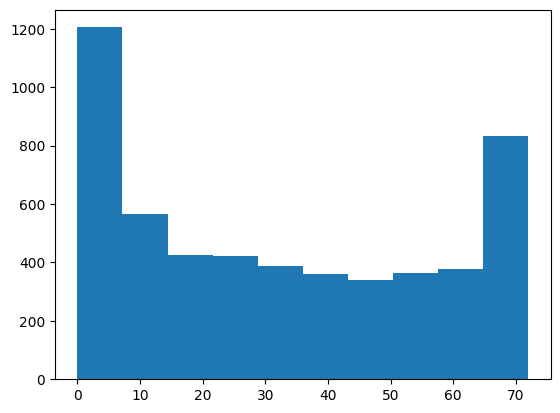

In [8]:
plt.hist(data['ClientPeriod'])

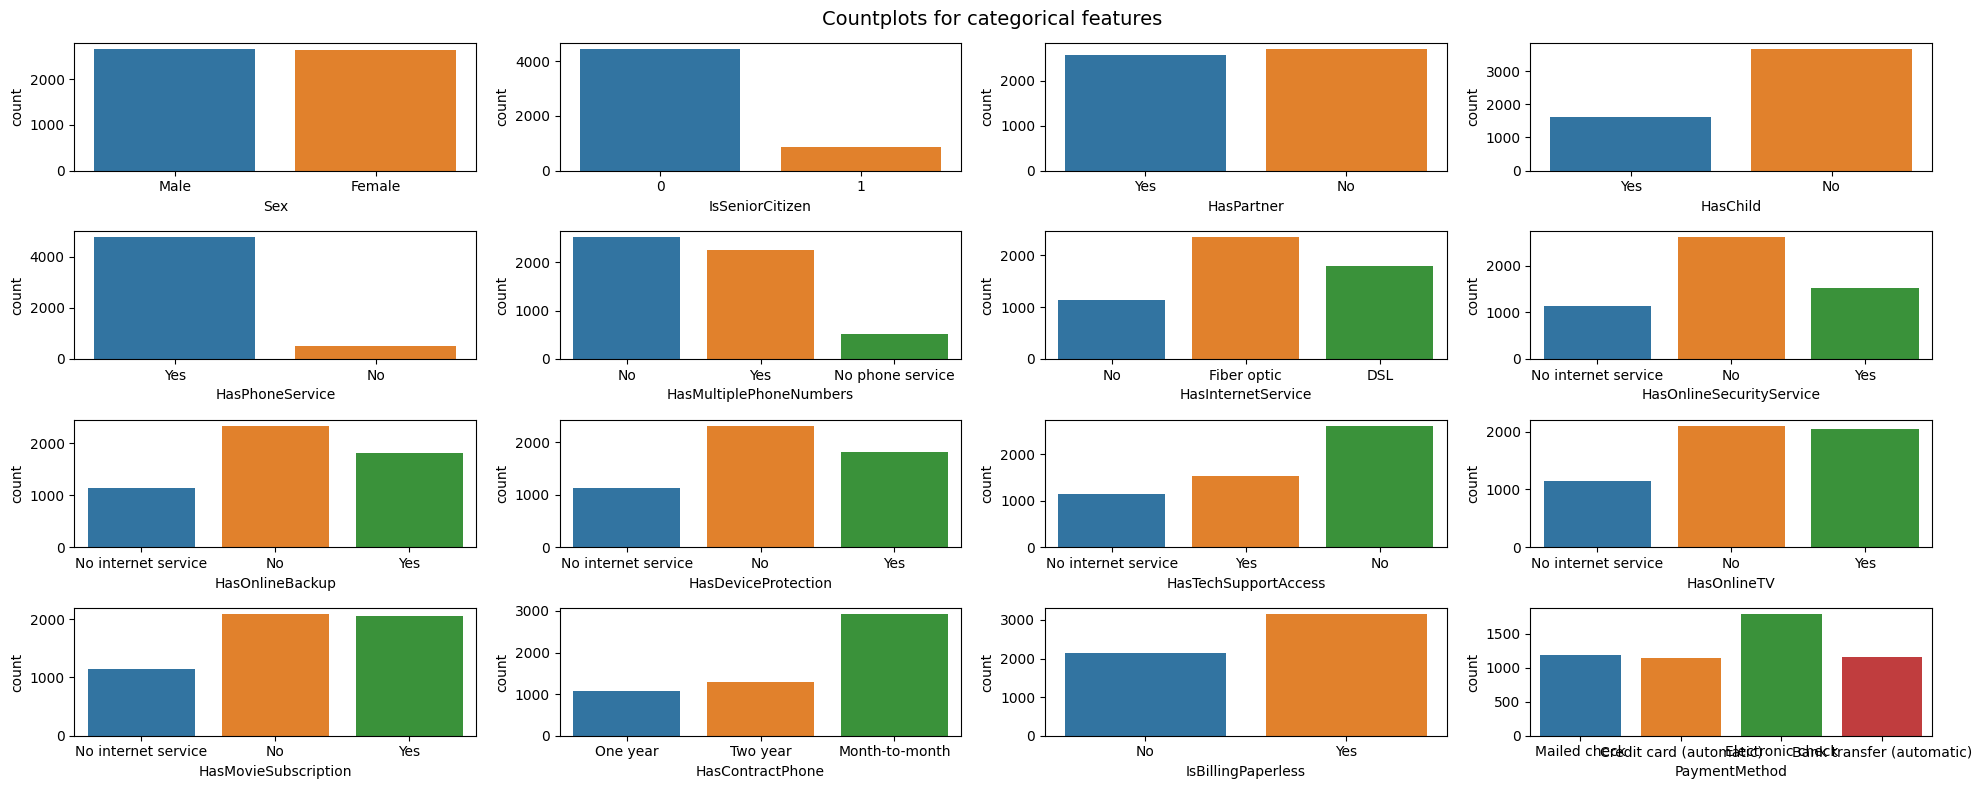

In [10]:
# Рассмотрим категориальные признаки

import seaborn as sns

fig = plt.figure(figsize = (20,8))
plt.suptitle("Countplots for categorical features ", fontsize = 14)
j = 1
for i in range(len(cat_cols)):
  plt.subplot(4,4,j)
  sns.countplot(data=data, x = cat_cols[i])
  j +=1

plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

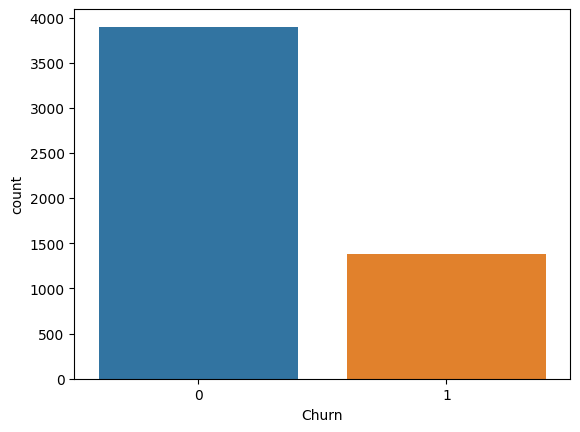

In [11]:
sns.countplot(data=data, x=target_col)  # Распределение целевой переменной

Видим, что данные несбалансированы. Но мы будем применять метрику ROC-AUC, которая НЕчувствительна к балансу классов

In [12]:
import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [15]:
from sklearn.compose import make_column_transformer

new_data = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

clf = make_pipeline(
    new_data,
    LogisticRegression(random_state=10)
    )
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
}
search_best_model = GridSearchCV(clf, param_grid, cv=10, verbose=0, scoring='roc_auc', refit=True)
X_train, X_valid, y_train, y_valid = train_test_split(data.drop(target_col, axis =1), data[target_col], test_size=0.2)
search_best_model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=10))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

In [16]:
search_best_model.best_score_

0.844625605178026

In [18]:
search_best_model.best_params_

{'logisticregression__C': 10}

In [20]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import roc_auc_score

grad_model = CatBoostClassifier()
grad_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=cat_cols, verbose=False)
simple_boost_preds_train = grad_model.predict_proba(X_train)[:,1]
roc_auc_score(y_train, simple_boost_preds_train)

0.878470119819672

In [24]:
simple_boost_preds = grad_model.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, simple_boost_preds)

0.8527356921278604

In [25]:
complex_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    cat_features=cat_cols,
    bootstrap_type = 'Bayesian',
    random_seed = 10,
    verbose=False,
    eval_metric = 'AUC:hints=skip_train~false')

search_catboost= complex_boost_model.grid_search({'max_depth': [2,4,5],
                       'learning_rate': np.linspace(0.01, 0.05, 10),
                     'l2_leaf_reg': [2,1],
                      'iterations'    : [500,700]},
                      X_train,
                      y_train,
                      cv=10)


bestTest = 0.8681573191
bestIteration = 495

0:	loss: 0.8681573	best: 0.8681573 (0)	total: 2.4s	remaining: 4m 45s

bestTest = 0.8704304688
bestIteration = 496

1:	loss: 0.8704305	best: 0.8704305 (1)	total: 4.83s	remaining: 4m 44s

bestTest = 0.8713633179
bestIteration = 499

2:	loss: 0.8713633	best: 0.8713633 (2)	total: 7.25s	remaining: 4m 42s

bestTest = 0.8727071926
bestIteration = 487

3:	loss: 0.8727072	best: 0.8727072 (3)	total: 10.8s	remaining: 5m 13s

bestTest = 0.8728716028
bestIteration = 482

4:	loss: 0.8728716	best: 0.8728716 (4)	total: 13.3s	remaining: 5m 6s

bestTest = 0.872796546
bestIteration = 489

5:	loss: 0.8727965	best: 0.8728716 (4)	total: 16.6s	remaining: 5m 14s

bestTest = 0.8730789026
bestIteration = 456

6:	loss: 0.8730789	best: 0.8730789 (6)	total: 20.1s	remaining: 5m 24s

bestTest = 0.8743084049
bestIteration = 430

7:	loss: 0.8743084	best: 0.8743084 (7)	total: 24.4s	remaining: 5m 41s

bestTest = 0.8743155532
bestIteration = 498

8:	loss: 0.8743156	best: 0.87

In [26]:
search_catboost['params']

{'depth': 5,
 'l2_leaf_reg': 2,
 'iterations': 500,
 'learning_rate': 0.04111111111111111}

In [27]:
final_cb_model = CatBoostClassifier(
    depth=5,
    iterations=500,
    eval_metric = 'AUC:hints=skip_train~false',
    l2_leaf_reg = 1,
    learning_rate=0.05,
    cat_features=cat_cols,
    random_seed=10)

final_cb_model.fit(X_train, y_train, eval_set=(X_valid, y_valid),cat_features=cat_cols, verbose=False)
pred_final_cb_model = final_cb_model.predict_proba(X_train)[:,1]
roc_auc_score(y_train, pred_final_cb_model)

0.8730563095821289

In [28]:
pred_final_cb_model_valid = final_cb_model.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, pred_final_cb_model_valid)

0.8533268893584498

0.8533 при
'depth': 5,
 'l2_leaf_reg': 2,
 'iterations': 500,
 'learning_rate': 0.04111111111111111

# Предсказания

In [29]:
best_model = final_cb_model

In [30]:
test = pd.read_csv('./test.csv')
test['TotalSpent'] = pd.to_numeric(test['TotalSpent'], errors='coerce')
test['TotalSpent'] = test['TotalSpent'].fillna(test['TotalSpent'].mean())
preds = best_model.predict_proba(test)[:, 1]
submission = pd.read_csv('./submission.csv')
submission['Churn'] = preds

submission.to_csv('submission.csv', index = False)
submission.head()

,Id,Churn
0,0,0.027440
1,1,0.756517
2,2,0.672988
3,3,0.013662
4,4,0.003628
